# Analysis of tips.csv dataset - WORK IN PROGRESS
Data analysis of the tips.csv dataset in completion of Module 52446 "Fundamentals of Data Analysis", Higher Diploma in Data Analytics, Galway-Mayo Institute of Technology

## What is in this document


### Layout of document
Each section will start with data analysis and results, followed by a textual description and interpretation of findings.

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import tips.csv dataset
df = pd.read_csv('tips.csv')

In [3]:
# Identify column titles and first 5 rows
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Check across data variables for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
# Reveal some basic descriptive statistics
for col in df:
    print("Descriptive statistics for variable: {}".format(col))
    print(df[col].describe())
    print()

Descriptive statistics for variable: total_bill
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Descriptive statistics for variable: tip
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Descriptive statistics for variable: sex
count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

Descriptive statistics for variable: smoker
count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

Descriptive statistics for variable: day
count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

Descriptive statistics for variable: time
count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

Descriptive st

In [29]:
# Compare descriptive statistics across gender - Male
round(df.loc[df.loc[: , 'sex'] == 'Male'].describe(),2)

,total_bill,tip,size,perc
count,157.00,157.00,157.00,157.00
mean,20.74,3.09,2.63,15.76
std,9.25,1.49,0.96,6.48
min,7.25,1.00,1.00,3.56
25%,14.00,2.00,2.00,12.14
50%,18.35,3.00,2.00,15.35
75%,24.71,3.76,3.00,18.62
max,50.81,10.00,6.00,71.03


In [27]:
# Compare descriptive statistics across gender - Female
round(df.loc[df.loc[: , 'sex'] == 'Female'].describe(),2)

,total_bill,tip,size,perc
count,87.00,87.00,87.00,87.00
mean,18.06,2.83,2.46,16.65
std,8.01,1.16,0.94,5.36
min,3.07,1.00,1.00,5.64
25%,12.75,2.00,2.00,14.04
50%,16.40,2.75,2.00,15.56
75%,21.52,3.50,3.00,19.42
max,44.30,6.50,6.00,41.67


In [7]:
# Identify the unique names used in variables of dtype object: sex, smoker, day, time, size 
for data in df.iloc[:, 2:6]:
    print("Unique names for variable:")
    print(df.groupby(data).size())
    print()

Unique names for variable:
sex
Female     87
Male      157
dtype: int64

Unique names for variable:
smoker
No     151
Yes     93
dtype: int64

Unique names for variable:
day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

Unique names for variable:
time
Dinner    176
Lunch      68
dtype: int64



In [8]:
# Determine proportion of males in sample
gender = df.groupby('sex').size()
propmale = round((gender['Male']/(gender['Female']+gender['Male']))*100, 2)
f"Proportion of sample that are male: {propmale}%"

'Proportion of sample that are male: 64.34%'

In [9]:
# Determine proportion of smokers in sample
smokers = df.groupby('smoker').size()
propsmoker = round((smokers['Yes']/(smokers['No']+smokers['Yes']))*100, 2)
f"Proportion of sample that are smokers: {propsmoker}%"

'Proportion of sample that are smokers: 38.11%'

Text(0.5, 1.0, 'Scatterplot of total bill to tip amount')

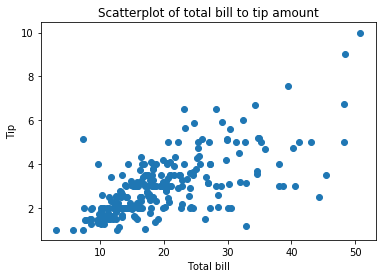

In [10]:
# Is there an association between total bill and tip - a scatterplot
plt.scatter('total_bill', 'tip', data=df)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Scatterplot of total bill to tip amount')

In [28]:
# Create new column indicating tip percentage of total_bill
df['perc'] = round(df.tip/df.total_bill*100 ,2)
df

,total_bill,tip,sex,smoker,day,time,size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


In [12]:
# Describe new variable
df['perc'].describe()

count    244.000000
mean      16.079754
std        6.107020
min        3.560000
25%       12.910000
50%       15.475000
75%       19.147500
max       71.030000
Name: perc, dtype: float64

In [13]:
# What was the bill with the largest tip
df[df.perc == 71.03]

,total_bill,tip,sex,smoker,day,time,size,perc
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03


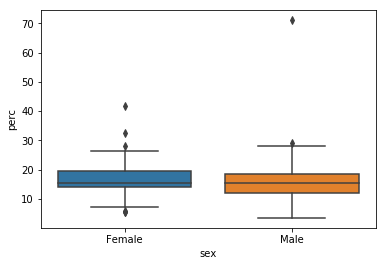

In [14]:
# Is there a difference in percentage tip by gender?
sns.boxplot(x='sex', y='perc', data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


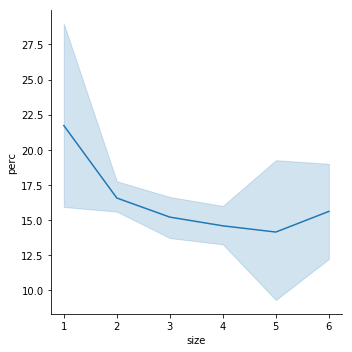

In [15]:
# Is there an association between tip percentage and party size?
sns.relplot(x='size', y='perc', kind="line", data=df)

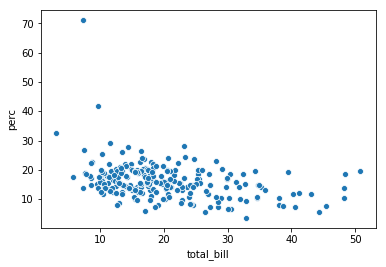

In [16]:
# Is there a relationship between tip percentage and total bill amount?
sns.scatterplot(x="total_bill", y="perc", data=df)

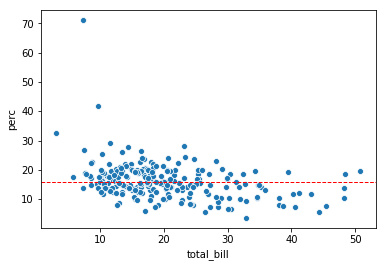

In [17]:
# What section of tips fall below 16%?
# Source: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py
sns.scatterplot(x="total_bill", y="perc", data=df)
plt.axhline(y=16, color="red", ls="--", linewidth=1)

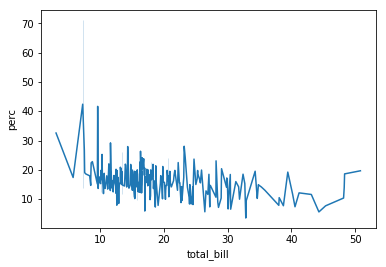

In [18]:
sns.lineplot(x="total_bill", y="perc", data=df)

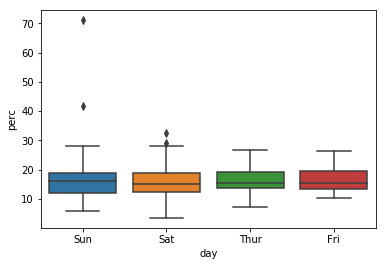

In [19]:
# Is there a relationship between day of week and tip percentage?
sns.boxplot(x="day", y="perc", data=df)

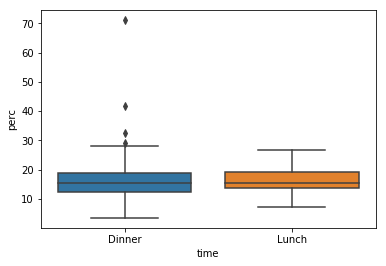

In [20]:
# Is there a relationship between time of meal and tip percentage?
sns.boxplot(x="time", y="perc", data=df)

In [21]:
# What day offers the largest absolute tip amount?
df.groupby('day').sum().tip # source: https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [22]:
# What is the smallest total bill that gives at least the average percentage tip (16%)?
df2 = df[df.perc > 16].sort_values(by=['total_bill'])
f"The smallest total bill amount with a percentage tip of more than 16% is {df2.iloc[0,0]}"

'The smallest total bill amount with a percentage tip of more than 16% is 3.07'

In [23]:
df.groupby('day').describe()['tip']

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70


The most reliable time for waitstaff to make money from tips is lunch time on a Friday, ideally a group of 1-2 people with a female paying, with total bills starting at as little as 3.07. It would also appear that there is diminishing returns on larger bill amounts. However, more total amount in tips can be made on a Saturday. 

### References
- pandas website
- matplotlib tutorial
- python documentation